In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
X = data.drop(["class"], axis=1)
y = data["class"]

X_encoded = pd.get_dummies(X, prefix_sep="_")
y_encoded = LabelEncoder().fit_transform(y)
X_scaled = StandardScaler().fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=15)


In [9]:
X_scaled

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time

In [16]:
start = time.process_time()
model = RandomForestClassifier(n_estimators=700).fit(X_train, y_train)
print(time.process_time() - start)

preds = model.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test,preds))

2.022361
[[1263    0]
 [   0 1175]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [17]:
X_scaled.shape

(8124, 117)

In [18]:
import matplotlib.pyplot as plt

<AxesSubplot:>

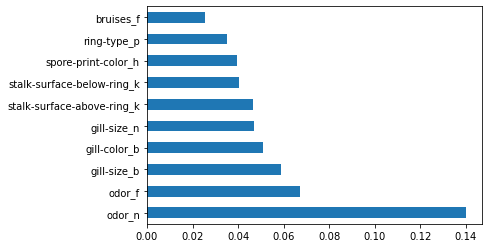

In [21]:
feature_imp = pd.Series(model.feature_importances_, index=X_encoded.columns)
feature_imp.nlargest(10).plot(kind="barh")

In [22]:
best_features = feature_imp.nlargest(4).index

In [23]:
best_features

Index(['odor_n', 'odor_f', 'gill-size_b', 'gill-color_b'], dtype='object')

In [24]:
X_reduced = X_encoded[best_features]

In [25]:
Xr_scaled = StandardScaler().fit_transform(X_reduced)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, y_encoded, test_size=0.3, random_state=15)

In [26]:
start = time.process_time()
rmodel = RandomForestClassifier(n_estimators=700).fit(Xr_train, yr_train)
print(time.process_time()-start)
rpred = rmodel.predict(Xr_test)

1.3173120000000011


In [27]:
print(confusion_matrix(yr_test, rpred))
print(classification_report(yr_test,rpred))

[[1227   36]
 [  61 1114]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1263
           1       0.97      0.95      0.96      1175

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

